In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv('Churn.csv')

In [155]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Analysis

In [156]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [157]:
df.shape

(7043, 21)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [159]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [160]:
df.duplicated().sum()

0

In [161]:
# drop the customerID column as it has no influence on the data
df1 = df.drop('customerID',axis=1).copy()
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [162]:
df1['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [163]:
df1['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [164]:
# as it can be seen, there are empty strings, even if we do not have null values in 'df.isnull().sum()'
df1['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float')
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


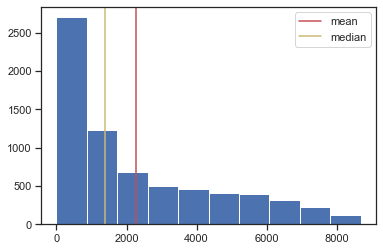

In [165]:
plt.hist(df1['TotalCharges']);
plt.axvline(df1['TotalCharges'].mean(), color='r', label = "mean")
plt.axvline(df1['TotalCharges'].median(), color='y', label = "median")
plt.legend()

In [166]:
df1['TotalCharges'] = df1['TotalCharges'].replace(0, df1['TotalCharges'].mean()).astype('float')
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [167]:
df1['TotalCharges'].value_counts()
# now, we do not have here null values

2279.734304    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [168]:
for i in df1:
    print(i + ':')
    print(df1[i].value_counts())

gender:
Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64
tenure:
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceP

In [169]:
# Handling Categorical Data
# column gender
from sklearn.preprocessing import OneHotEncoder
onehotencoder = pd.get_dummies(df1['gender'], drop_first=True)
# Drop column non_numeric_col as it is now encoded
df1 = df1.drop('gender',axis = 1)
# # Join the encoded dataframe to X
df1 = df1.join(onehotencoder)

In [170]:
df1

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [171]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df1 = df1.apply(lambda x: object_to_int(x))
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,1
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,1
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


In [172]:
# as it can be seen above, a major number of columns has changed their data types from object to int64
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int32  
 5   MultipleLines     7043 non-null   int32  
 6   InternetService   7043 non-null   int32  
 7   OnlineSecurity    7043 non-null   int32  
 8   OnlineBackup      7043 non-null   int32  
 9   DeviceProtection  7043 non-null   int32  
 10  TechSupport       7043 non-null   int32  
 11  StreamingTV       7043 non-null   int32  
 12  StreamingMovies   7043 non-null   int32  
 13  Contract          7043 non-null   int32  
 14  PaperlessBilling  7043 non-null   int32  
 15  PaymentMethod     7043 non-null   int32  
 16  MonthlyCharges    7043 non-null   float64


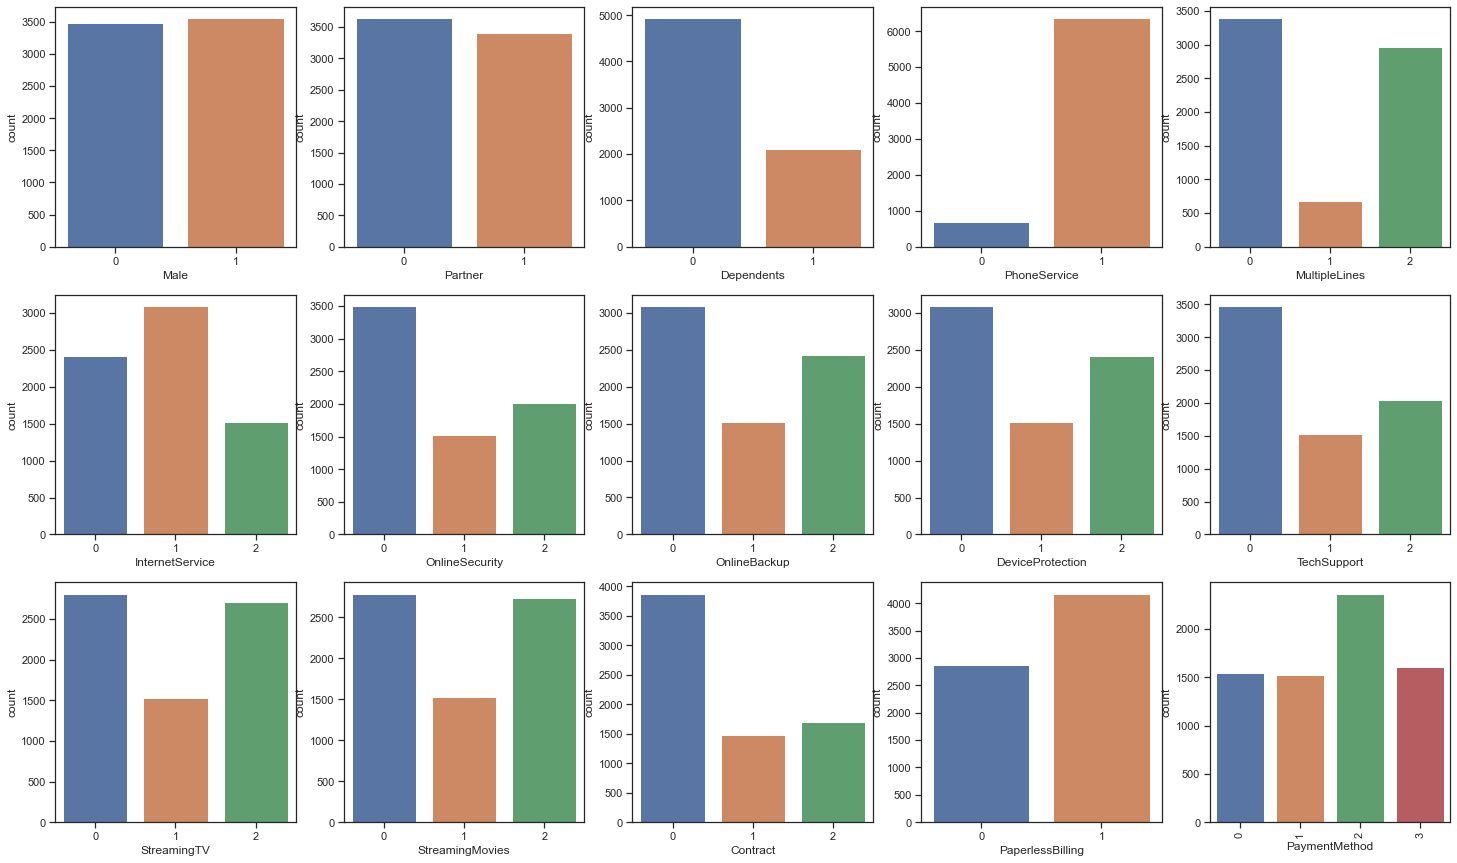

In [173]:
sns.set(style="ticks", color_codes=True)
df=df1
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "Male", data = df, ax=axes[0][0])
sns.countplot(x = "Partner", data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[2][1])
sns.countplot(x = "Contract", data = df, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

<AxesSubplot:>

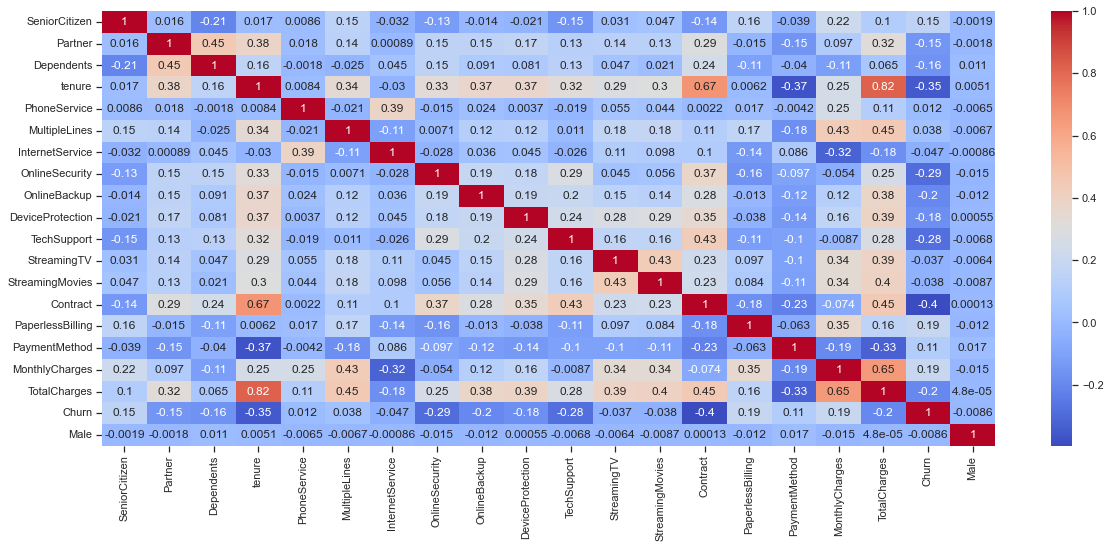

In [174]:
# correlation using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')

In [175]:
# Spliting target variable and independent variables
X = df1.drop(['Churn'], axis = 1)
y = df1['Churn']

In [177]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)

# Logisic Regression

In [201]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

#
y_pred=logreg.predict(X_test)

c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [202]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1131,  167],
       [ 208,  255]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

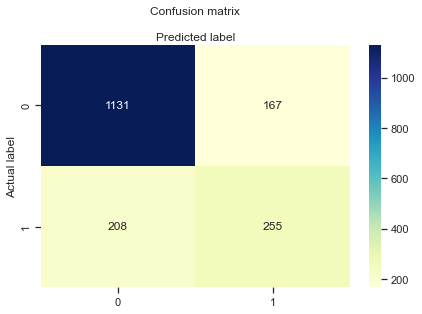

In [203]:
# as it can be seen from confusion matrix, the diagonal numbers (1131 and 255) are accurate predictions
# meanwhile the nondiagonal (167 and 208) are incorrect predictions
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [204]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) # how accurate the model is
print("Recall:",metrics.recall_score(y_test, y_pred)) # percentage of total relevant results correctly classified by your algorithm

Accuracy: 0.787052810902896
Precision: 0.6042654028436019
Recall: 0.550755939524838


## Hyperparameter Tuning

In [198]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\darinela\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\darinela\appdata

Best: 0.803396 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802544 (0.013095) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.800700 (0.012569) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802261 (0.011199) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.770931 (0.013668) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.766576 (0.013232) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.802449 (0.012869) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.766482 (0.013093) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.802639 (0.013095) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798664 (0.012584) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802308 (0.011173) with: {'C': 10, 'pen

In [205]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=0.1, penalty='l2', solver = 'newton-cg')

# fit the model with data
logreg.fit(X_train, y_train)
#
y_pred=logreg.predict(X_test)

cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2

array([[1158,  140],
       [ 218,  245]], dtype=int64)

In [206]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) # how accurate the model is
print("Recall:",metrics.recall_score(y_test, y_pred)) # percentage of total relevant results correctly classified by your algorithm

Accuracy: 0.7967064168086314
Precision: 0.6363636363636364
Recall: 0.5291576673866091


In [208]:
print('Simple Logistic Regression\n', cnf_matrix)
print('Logistic Regression after HyperParameter tuning\n', cnf_matrix2)

Simple Logistic Regression
 [[1131  167]
 [ 208  255]]
Logistic Regression after HyperParameter tunning
 [[1158  140]
 [ 218  245]]


In [ ]:
# LogisticRegression                  Logistic Regression after HyperParameter
#   Accuracy: 0.787052810902896         Accuracy: 0.7967064168086314
#   Precision: 0.6042654028436019       Precision: 0.6363636363636364
#   Recall: 0.550755939524838           Recall: 0.5291576673866091

# DecisionTreeClassifier

In [268]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(558.0, 951.3000000000001, 'X[13] <= 0.5\ngini = 0.391\nsamples = 5282\nvalue = [3876, 1406]'),
 Text(279.0, 679.5, 'X[7] <= 0.5\ngini = 0.49\nsamples = 2922\nvalue = [1663, 1259]'),
 Text(139.5, 407.70000000000005, 'X[3] <= 10.5\ngini = 0.5\nsamples = 1968\nvalue = [958, 1010]'),
 Text(69.75, 135.89999999999998, 'gini = 0.458\nsamples = 940\nvalue = [333, 607]'),
 Text(209.25, 135.89999999999998, 'gini = 0.477\nsamples = 1028\nvalue = [625, 403]'),
 Text(418.5, 407.70000000000005, 'X[16] <= 72.825\ngini = 0.386\nsamples = 954\nvalue = [705, 249]'),
 Text(348.75, 135.89999999999998, 'gini = 0.335\nsamples = 657\nvalue = [517, 140]'),
 Text(488.25, 135.89999999999998, 'gini = 0.465\nsamples = 297\nvalue = [188, 109]'),
 Text(837.0, 679.5, 'X[16] <= 93.75\ngini = 0.117\nsamples = 2360\nvalue = [2213, 147]'),
 Text(697.5, 407.70000000000005, 'X[7] <= 0.5\ngini = 0.068\nsamples = 1792\nvalue = [1729, 63]'),
 Text(627.75, 135.89999999999998, 'gini = 0.152\nsamples = 386\nvalue = [354, 

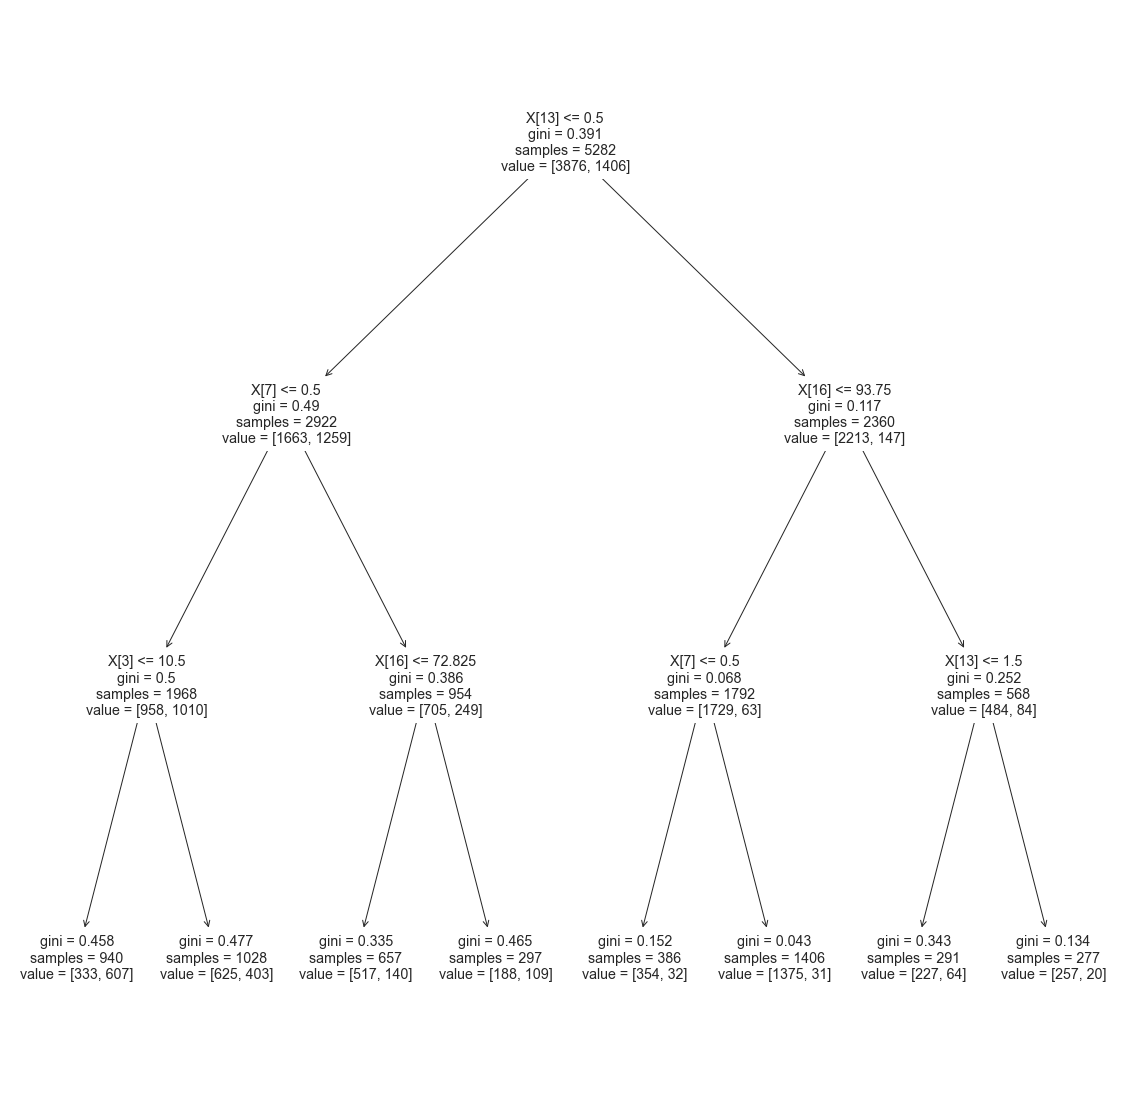

In [269]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20, 20))
plot_tree(clf)

In [270]:
y_pred = clf.predict(X_test)

In [271]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) # how accurate the model is
print("Recall:",metrics.recall_score(y_test, y_pred)) # percentage of total relevant results correctly classified by your algorithm

Accuracy: 0.7728563316297559
Precision: 0.5987460815047022
Recall: 0.41252699784017277


In [272]:
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix3

array([[1170,  128],
       [ 272,  191]], dtype=int64)

In [273]:
from sklearn.metrics import classification_report
 
# target_names = [1, 0]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1298
           1       0.60      0.41      0.49       463

    accuracy                           0.77      1761
   macro avg       0.71      0.66      0.67      1761
weighted avg       0.76      0.77      0.76      1761



## DecisionTreeClassifier with HyperParameter tuning

In [280]:
from sklearn.model_selection import GridSearchCV

In [281]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [282]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [283]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [284]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50)

In [285]:
clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) # how accurate the model is
print("Recall:",metrics.recall_score(y_test, y_pred)) # percentage of total relevant results correctly classified by your algorithm

Accuracy: 0.7819420783645656
Precision: 0.6179104477611941
Recall: 0.4470842332613391


In [286]:
cnf_matrix4 = metrics.confusion_matrix(y_test, y_pred)

print('DecisionTreeClassifier\n', cnf_matrix3)
print('DecisionTreeClassifier after HyperParameter tuning\n', cnf_matrix4)

DecisionTreeClassifier
 [[1170  128]
 [ 272  191]]
DecisionTreeClassifier after HyperParameter tuning
 [[1170  128]
 [ 256  207]]


In [ ]:
# from the ConfusionMatrix above, we can see that the number of TruePositive resuls and FalsePositive results are the same,
# but the real change was made in the TrueNegative and FalseNegative results, as the number of TN increased, therefore it became more correct

# DecisionTreeClassifier                 DecisionTreeClassifier with HyperParameter Tuning
#   Accuracy: 0.7967064168086314           Accuracy: 0.7819420783645656 
#   Precision: 0.6363636363636364          Precision: 0.6179104477611941
#   Recall: 0.5291576673866091             Recall: 0.4470842332613391